### Import Libraries

In [15]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from scipy.stats import uniform, truncnorm, randint
from sklearn.model_selection import RandomizedSearchCV

### Import Dataset

In [75]:
df = pd.read_csv("SocialAds.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
Age                398 non-null float64
EstimatedSalary    396 non-null float64
Purchased          400 non-null int64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [83]:
df.describe()

,Age,EstimatedSalary,Purchased
count,398.000000,396.00000,400.000000
mean,37.658291,69969.69697,0.357500
std,10.480103,34112.23606,0.479864
min,18.000000,15000.00000,0.000000
25%,30.000000,43000.00000,0.000000
50%,37.000000,70000.00000,0.000000
75%,46.000000,88000.00000,1.000000
max,60.000000,150000.00000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE88B7CD08>,
      dtype=object)

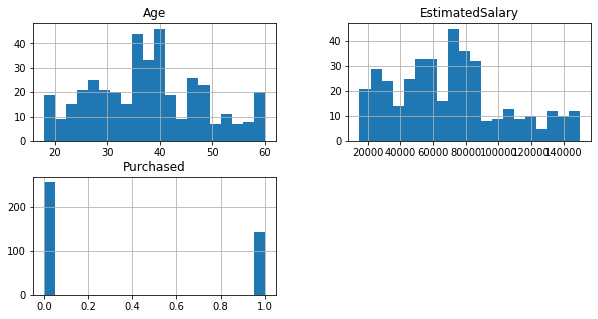

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins = 20, figsize = (10,5))

### Fill Missing Values with Mean

In [3]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

imputer = imputer.fit(df[['Age','EstimatedSalary']])
df[['Age','EstimatedSalary']] = imputer.transform(df[['Age','EstimatedSalary']])
df.head()

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0


### Scale the data

In [4]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df.iloc[:,:2])

### Classification with LinearSVC

In [7]:
#x = scaled
y = df.iloc[:,2:3]

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(scaled, y, test_size=0.2, random_state = 3)

In [16]:
ytrain = np.array(ytrain).ravel()
lsvc = LinearSVC(verbose=0, max_iter=1000)
lsvc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [17]:
#check the model accuracy score

lsvc.fit(xtrain, ytrain)
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

Score:  0.84375


In [18]:
#cross-validation training method

cv_scores = cross_val_score(lsvc, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.85


In [86]:
#predict the test data using the trained model
ypred = lsvc.predict(xtest)
print(ypred)
print("------------------------------")
#check the accuracy level by using the confusion matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

#classification report
cr = classification_report(ytest, ypred)
print(cr)

[1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 0]
------------------------------
[[52  3]
 [ 9 16]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        55
           1       0.84      0.64      0.73        25

    accuracy                           0.85        80
   macro avg       0.85      0.79      0.81        80
weighted avg       0.85      0.85      0.84        80



### SVC, set hyperparameter kernel as “linear” 

In [22]:
svc = SVC(kernel='linear')
svc.fit(xtrain, ytrain)
score = svc.score(xtrain, ytrain)
print("Score: ", score)

Score:  0.846875


In [23]:
y_pred = svc.predict(xtest)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
cm = confusion_matrix(ytest, y_pred)
print(cm)

cr = classification_report(ytest, y_pred)
print(cr) 

[[52  3]
 [10 15]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        55
           1       0.83      0.60      0.70        25

    accuracy                           0.84        80
   macro avg       0.84      0.77      0.79        80
weighted avg       0.84      0.84      0.83        80



### SGDClassifier, apply the parameter: loss=”hinge”

In [25]:
Ytrain = np.array(ytrain).ravel()
sgdc = SGDClassifier(loss = "hinge")
sgdc.fit(xtrain, Ytrain)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
score = sgdc.score(xtrain, Ytrain)
print("Training score: ", score) 

Training score:  0.828125


In [88]:
ypred = sgdc.predict(xtest)
print(ypred)
print("------------------------------------------------")
cm = confusion_matrix(ytest, ypred)
print(cm) 

[1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0]
------------------------------------------------
[[47  8]
 [11 14]]


In [29]:
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        55
           1       0.70      0.64      0.67        25

    accuracy                           0.80        80
   macro avg       0.77      0.76      0.76        80
weighted avg       0.80      0.80      0.80        80



### Try the rest parameters by yourself

In [30]:
#Test with other parameters
sgdc = SGDClassifier(max_iter=1300, tol=0.01, loss = "squared_hinge")
print(sgdc)

sgdc.fit(xtrain, ytrain)
score = sgdc.score(xtrain, ytrain)
print("Score: ", score)

Ypred = sgdc.predict(xtest)

cm = confusion_matrix(ytest, Ypred)
print(cm)

cr = classification_report(ytest, Ypred)
print(cr) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='squared_hinge',
              max_iter=1300, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.01,
              validation_fraction=0.1, verbose=0, warm_start=False)
Score:  0.821875
[[47  8]
 [11 14]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        55
           1       0.64      0.56      0.60        25

    accuracy                           0.76        80
   macro avg       0.72      0.71      0.71        80
weighted avg       0.76      0.76      0.76        80



### SVC, set hyperparameters kernel as “rbf”, random_state as zero

In [31]:
#gamma = 'scale' to avoid FutureWarning error

svc = SVC(kernel='rbf', random_state = 0, gamma='scale')
svc.fit(xtrain, ytrain)
score = svc.score(xtrain, ytrain)
print("Score: ", score)

Score:  0.915625


In [89]:
Y_pred = svc.predict(xtest)
print(Y_pred)

cm = confusion_matrix(ytest, Y_pred)
print(cm)

cr = classification_report(ytest, Y_pred)
print(cr) 

[1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1
 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0
 0 0 0 0 0 0]
[[49  6]
 [ 4 21]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        55
           1       0.78      0.84      0.81        25

    accuracy                           0.88        80
   macro avg       0.85      0.87      0.86        80
weighted avg       0.88      0.88      0.88        80



### SVC, use RandomizedSearchCV()

In [98]:
model_params = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}

In [100]:
svc_model = SVC()

# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
clf = RandomizedSearchCV(svc_model, model_params, n_iter=100, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(xtrain, ytrain)
score = clf.score(xtrain, ytrain)
print(score)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

0.903125
{'C': 3.0445224973151745,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.0570472708820368,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


C:\Users\Nafis\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
